<a href="https://colab.research.google.com/github/adithyabalakumar/EVA-4/blob/master/S11/s11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/S11/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/S11


# Import Libraries

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Import loader

* Initialize train and test loaders from train and test dataset respectively

* CUDA check

In [3]:
import loader

# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


# Plot training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


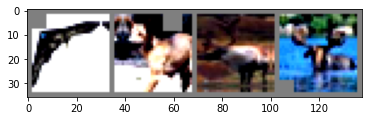

In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader.trainloader_for_plot)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

Initialize network for the model

In [0]:
import ResnetS11

# Model parameters

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = ResnetS11.ResnetS11().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14      

#LR Range Finder

  pip install torch-lr-finder -v --global-option="amp"


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


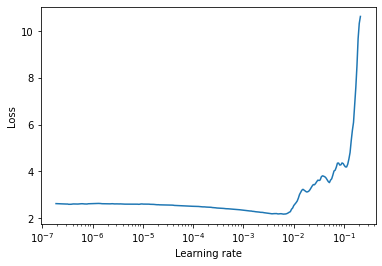

In [7]:
from LRfinder import LRFinder
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-7)
lr_finder = LRFinder(net, optimizer, criterion, device="cuda")
lr_finder.range_test(loader.trainloader, end_lr=10, num_iter=350, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

# Optimizer and Scheduler(OneCycle LR)



In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, nesterov=True)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,
                 max_lr=0.03,
                 total_steps=24,
                 epochs=24,
                 pct_start=0.2,
                 cycle_momentum=False,
                 base_momentum=0.85,
                 max_momentum=0.95,
                 div_factor=10.,
                 final_div_factor=1e4,
                 last_epoch=-1)



# Training and Testing

In [0]:
import train
import test

# Training and testing our model

In [15]:
epochs = 24
last_epoch=False

for epoch in range(epochs):
  train.train(net, device, loader.trainloader, optimizer,epoch)
  if epoch == epochs - 1:
    last_epoch = True
  test.test(net, device, loader.testloader,last_epoch)
  

Epoch= 0 Loss=1.272125482559204 Batch_id=390 Accuracy=49.07: 100%|██████████| 391/391 [00:18<00:00, 21.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 1.1056, Accuracy: 6000/10000 (60.00%)



Epoch= 1 Loss=0.9577203989028931 Batch_id=390 Accuracy=64.59: 100%|██████████| 391/391 [00:18<00:00, 21.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.8467, Accuracy: 7046/10000 (70.46%)



Epoch= 2 Loss=0.6176668405532837 Batch_id=390 Accuracy=70.94: 100%|██████████| 391/391 [00:18<00:00, 21.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.7788, Accuracy: 7297/10000 (72.97%)



Epoch= 3 Loss=0.8389703035354614 Batch_id=390 Accuracy=74.43: 100%|██████████| 391/391 [00:18<00:00, 21.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.6903, Accuracy: 7637/10000 (76.37%)



Epoch= 4 Loss=0.5761038064956665 Batch_id=390 Accuracy=76.76: 100%|██████████| 391/391 [00:18<00:00, 21.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.6183, Accuracy: 7883/10000 (78.83%)



Epoch= 5 Loss=0.6560745239257812 Batch_id=390 Accuracy=78.89: 100%|██████████| 391/391 [00:18<00:00, 21.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.5527, Accuracy: 8118/10000 (81.18%)



Epoch= 6 Loss=0.5351330637931824 Batch_id=390 Accuracy=80.46: 100%|██████████| 391/391 [00:18<00:00, 21.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.4951, Accuracy: 8287/10000 (82.87%)



Epoch= 7 Loss=0.5334540009498596 Batch_id=390 Accuracy=81.95: 100%|██████████| 391/391 [00:18<00:00, 21.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.4862, Accuracy: 8316/10000 (83.16%)



Epoch= 8 Loss=0.31881994009017944 Batch_id=390 Accuracy=83.10: 100%|██████████| 391/391 [00:18<00:00, 21.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.4927, Accuracy: 8335/10000 (83.35%)



Epoch= 9 Loss=0.37385275959968567 Batch_id=390 Accuracy=84.07: 100%|██████████| 391/391 [00:18<00:00, 21.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.5674, Accuracy: 8086/10000 (80.86%)



Epoch= 10 Loss=0.3164469301700592 Batch_id=390 Accuracy=85.15: 100%|██████████| 391/391 [00:18<00:00, 21.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.4654, Accuracy: 8491/10000 (84.91%)



Epoch= 11 Loss=0.40607142448425293 Batch_id=390 Accuracy=85.76: 100%|██████████| 391/391 [00:18<00:00, 21.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.4344, Accuracy: 8535/10000 (85.35%)



Epoch= 12 Loss=0.27075323462486267 Batch_id=390 Accuracy=86.52: 100%|██████████| 391/391 [00:18<00:00, 21.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.4016, Accuracy: 8667/10000 (86.67%)



Epoch= 13 Loss=0.4131701588630676 Batch_id=390 Accuracy=87.32: 100%|██████████| 391/391 [00:18<00:00, 21.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.4742, Accuracy: 8466/10000 (84.66%)



Epoch= 14 Loss=0.5618679523468018 Batch_id=390 Accuracy=87.94: 100%|██████████| 391/391 [00:18<00:00, 21.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.4201, Accuracy: 8604/10000 (86.04%)



Epoch= 15 Loss=0.4486846923828125 Batch_id=390 Accuracy=88.37: 100%|██████████| 391/391 [00:18<00:00, 21.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.4003, Accuracy: 8705/10000 (87.05%)



Epoch= 16 Loss=0.19673308730125427 Batch_id=390 Accuracy=88.66: 100%|██████████| 391/391 [00:18<00:00, 21.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.4034, Accuracy: 8648/10000 (86.48%)



Epoch= 17 Loss=0.32867443561553955 Batch_id=390 Accuracy=89.07: 100%|██████████| 391/391 [00:18<00:00, 21.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.4191, Accuracy: 8637/10000 (86.37%)



Epoch= 18 Loss=0.3641301095485687 Batch_id=390 Accuracy=89.65: 100%|██████████| 391/391 [00:18<00:00, 21.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.3951, Accuracy: 8684/10000 (86.84%)



Epoch= 19 Loss=0.15960893034934998 Batch_id=390 Accuracy=90.04: 100%|██████████| 391/391 [00:18<00:00, 21.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.3725, Accuracy: 8772/10000 (87.72%)



Epoch= 20 Loss=0.29454976320266724 Batch_id=390 Accuracy=90.60: 100%|██████████| 391/391 [00:18<00:00, 21.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.4248, Accuracy: 8663/10000 (86.63%)



Epoch= 21 Loss=0.19693531095981598 Batch_id=390 Accuracy=90.88: 100%|██████████| 391/391 [00:18<00:00, 21.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.4015, Accuracy: 8717/10000 (87.17%)



Epoch= 22 Loss=0.2854141592979431 Batch_id=390 Accuracy=91.23: 100%|██████████| 391/391 [00:18<00:00, 20.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.3945, Accuracy: 8754/10000 (87.54%)



Epoch= 23 Loss=0.2773849368095398 Batch_id=390 Accuracy=91.30: 100%|██████████| 391/391 [00:18<00:00, 20.91it/s]



Validation set: Average loss: 0.4042, Accuracy: 8714/10000 (87.14%)



# Result visualization

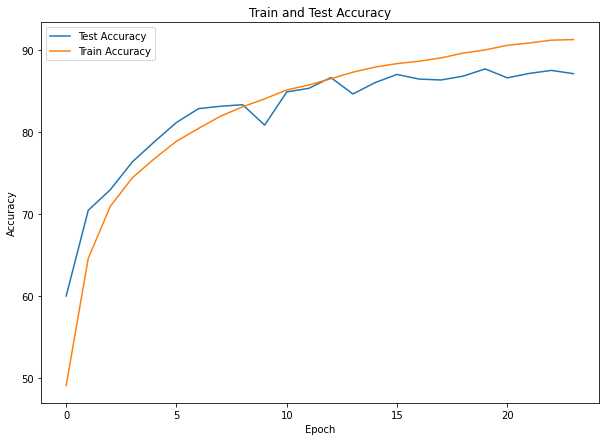

In [16]:
val_acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.plot(test.test_acc)
axs.plot(train.train_acc)
axs.set_title("Train and Test Accuracy")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
axs.legend(['Test Accuracy', 'Train Accuracy'], loc='best')
val_acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S11/accuracy_change_plot.jpg')

# Triangular Wave

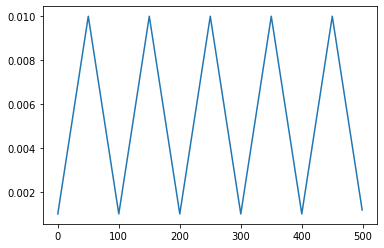

In [17]:
def get_triangular_lr(iteration, stepsize, base_lr, max_lr):
    """Given the inputs, calculates the lr that should be applicable for this iteration"""
    cycle = np.floor(1 + iteration/(2  * stepsize))
    x = np.abs(iteration/stepsize - 2 * cycle + 1)
    lr = base_lr + (max_lr - base_lr) * np.maximum(0, (1-x))
    return lr


num_iterations = 500
stepsize = 50
base_lr = 0.001
max_lr = 0.01
lr_trend = list()

for iteration in range(num_iterations):
    lr = get_triangular_lr(iteration, stepsize, base_lr, max_lr)
    # Update your optimizer to use this learning rate in this iteration
    lr_trend.append(lr)

plt.plot(lr_trend)

What are the classes that performed well, and the classes that did
not perform well:



In [18]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader.testloader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = net(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1


for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 79/79 [00:02<00:00, 36.92it/s]

Accuracy of plane : 72 %
Accuracy of   car : 100 %
Accuracy of  bird : 95 %
Accuracy of   cat : 92 %
Accuracy of  deer : 80 %
Accuracy of   dog : 76 %
Accuracy of  frog : 84 %
Accuracy of horse : 84 %
Accuracy of  ship : 100 %
Accuracy of truck : 88 %
